# SQL Review Presentation: Joins

#### By Team 1: Idongesit Bokeime, Isaac Ifinju, Josiah Aramide and  Ereshia Gabier 

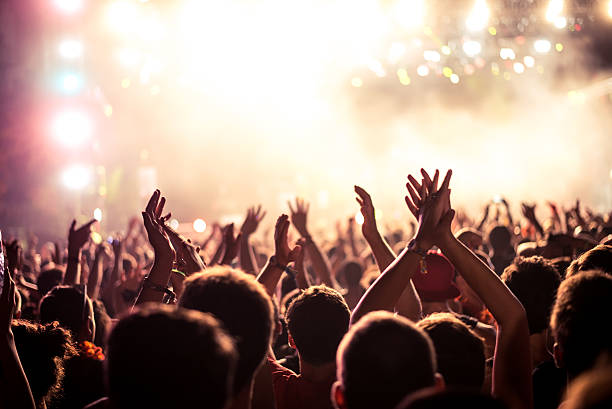

# Aim

Query the Chinook Database to aid in finding the best location, artist lineup, winners and employees for one of the biggest Music Festivals of 2023.

## Learning Objectives

In this presentation, we will be exploring the different SQL JOIN statements:

- Joining multiple tables

- Inner JOIN 

- Left JOIN

- Right JOIN

- Outer JOIN

- Union operator

- Self JOIN



#### Load SQL magic commands

In [1]:
%load_ext sql

#### Load Chinook SQLite database

In [2]:
%%sql 

sqlite:///chinook.db

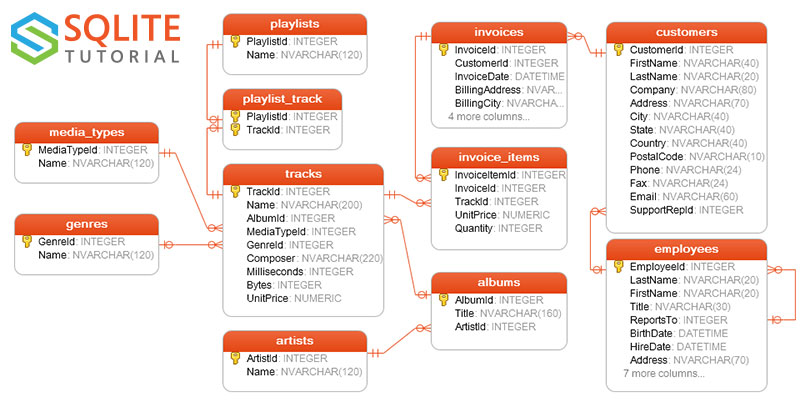

### ** The country to hold the concert. **

In [3]:
%%sql
--Below is the Query that gives the Highest Total of Invoice for our Country choice of concert

SELECT 
    Billingcountry,
    COUNT(InvoiceID) AS Number_of_Invoices,
    ROUND(SUM(TOTAL), 2) AS Total
    
FROM 
    invoices
    
GROUP BY 1
ORDER BY 2 DESC
LIMIT 5;

 * sqlite:///chinook.db
Done.


BillingCountry,Number_of_Invoices,Total
USA,91,523.06
Canada,56,303.96
France,35,195.1
Brazil,35,190.1
Germany,28,156.48


## 1.  INNER JOIN

### JOINING MULTIPLE TABLES USING

INNER JOIN returns records with matching values in both tables. 

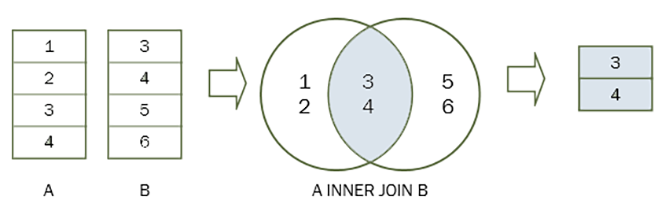

We can perform join on multiple tables as long as there is a relationship.

Synatx for multiple join:

    SELECT [column_names] FROM [table_name_one]
    [join_type] JOIN [table_name_two] ON [join_constaint]
    [join_type] JOIN [table_name_three] ON [join_constaint];
    
    
The SQL engine interprets JOIN in order, so the first JOIN will be executed then the second will be executed against the result of the first JOIN.

### ** The best genre for the concert. **

In [9]:
%%sql 
--Below is the Query that returns the highest genre purchase in our billing country - USA

SELECT 
    I.BillingCountry,
    COUNT(T.GenreID) AS Number_Genre,
    G.Name AS Genre
    
FROM 
    invoices I
    
INNER JOIN invoice_items IL
    ON I.InvoiceId = IL.InvoiceId
    
INNER JOIN tracks T
    ON IL.TrackId = T.TrackId
    
INNER JOIN genres G
    ON T.GenreID = G.GenreID
    
WHERE I.BillingCountry = "USA" 
ORDER BY T.GenreID;

 * sqlite:///chinook.db
Done.


BillingCountry,Number_Genre,Genre
USA,494,Alternative & Punk


### ** The best artist lineup. **

In [10]:
%%sql
--Below is the Query that returns the best artist lineup for the concert

SELECT 
    AR.name AS Band,
    COUNT(T.name) AS Band_Count
    
FROM 
    tracks T
    
INNER JOIN genres G 
    ON T.GenreId = G.GenreId
    
INNER JOIN albums AL
    ON AL.AlbumId = T.AlbumId
    
INNER JOIN artists AR 
    ON AR.ArtistId = AL.ArtistId
    
WHERE G.name = 'Alternative & Punk'
GROUP BY 1
ORDER BY 2 DESC
LIMIT 5;

 * sqlite:///chinook.db
Done.


Band,Band_Count
Titãs,38
Faith No More,37
Smashing Pumpkins,34
Green Day,34
R.E.M.,27


### ** Winners to attend the Concert **

In [ ]:
%%sql
--Below is the Query that returns the top ten customers for the concert

SELECT
    c.customerid,
    c.firstname||' '||c.lastname AS Customer_Name,
    c.phone AS Phone_Number,
    round(SUM(i.total), 2) AS Total_Spent
    
FROM 
    customers c
    
INNER JOIN invoices i 
    ON c.customerid = i.customerid
    
GROUP BY 2  
ORDER BY 4 DESC  --arrange from highest spender
LIMIT 10; -- giving us the top 10 customers by total spending

 * sqlite:///chinook.db
Done.


CustomerId,Customer_Name,Phone_Number,Total_Spent
6,Helena Holý,+420 2 4177 0449,49.62
26,Richard Cunningham,+1 (817) 924-7272,47.62
57,Luis Rojas,+56 (0)2 635 4444,46.62
45,Ladislav Kovács,None,45.62
46,Hugh O'Reilly,+353 01 6792424,45.62
28,Julia Barnett,+1 (801) 531-7272,43.62
37,Fynn Zimmermann,+49 069 40598889,43.62
24,Frank Ralston,+1 (312) 332-3232,43.62
25,Victor Stevens,+1 (608) 257-0597,42.62
7,Astrid Gruber,+43 01 5134505,42.62


The JOIN clause has two parts;

    1. The JOIN which tells the SQL engine the name of the tables we wish to use the INNER JOIN;
    2. ON, which tells the SQL engine what columns to use to join the table 

## 3. LEFT JOIN

When joining two tables, the LEFT JOIN includes all the rows that an INNER JOIN will select and any row(s) from the first (LEFT) table that does not have a matching the second (RIGHT) table.

If no match is found, then the result from the right table is NULL on that row.

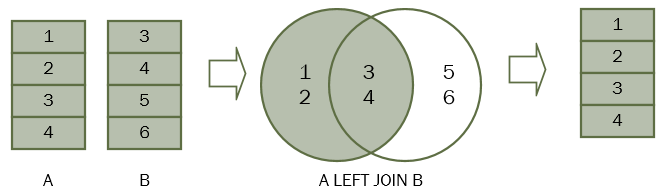

### ** The employees that will be part of the concert **

In [3]:
%%sql
--Below is the query that outputs the employees

SELECT
    e.employeeid AS Employee_ID,
    e.firstname||' '||e.lastname AS Employee_Name,
    e.title AS Title,
    c.firstname||' '||c.lastname  AS Customer_Name,
    c.supportrepid
    
FROM 
    employees AS e
    
LEFT JOIN customers AS c
    ON e.employeeid = c.supportrepid

GROUP BY e.employeeid;

 * sqlite:///chinook.db
Done.


Employee_ID,Employee_Name,Title,Customer_Name,SupportRepId
1,Andrew Adams,General Manager,None,None
2,Nancy Edwards,Sales Manager,None,None
3,Jane Peacock,Sales Support Agent,Luís Gonçalves,3
4,Margaret Park,Sales Support Agent,Bjørn Hansen,4
5,Steve Johnson,Sales Support Agent,Leonie Köhler,5
6,Michael Mitchell,IT Manager,None,None
7,Robert King,IT Staff,None,None
8,Laura Callahan,IT Staff,None,None


## 4. RIGHT JOIN

Functions like the LEFT JOIN except the splii over is from the Right Table

If no match is found, then the result from the Left table is NULL on that row.

Also use use it to query our NULLs for action.

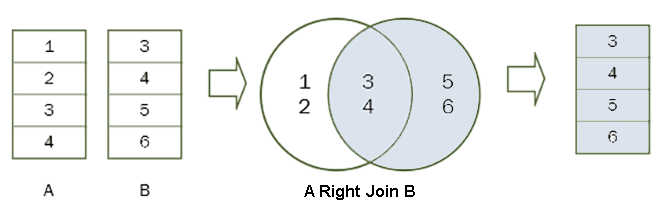


## 5. OUTER JOIN

The FULL OUTER JOIN keyword returns all records when there is a match in left (table1) or right (table2) table records.

Tip: FULL OUTER JOIN and FULL JOIN are the same.

(Not currently supported by SQL)

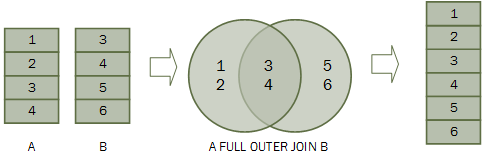

## 6. UNION

The UNION operator is used to combine the result-set of two or more SELECT statements.

*  Both tables within UNION must have the same number of columns
*  Both columns must also have similar data types
* The columns in every SELECT statement must also be in the same order



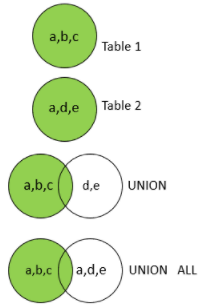


### ** Customers based in USA with their invoices/bills in USA **

In [11]:
%%sql
--Below is the Query that returns the confirmation of customers address and their biiling address

SELECT
    c.customerid,
    c.address address,
    c.country
    
FROM 
    customers c
    
WHERE c. country like 'USA'

UNION

SELECT
    i.customerid,
    i.billingaddress address,
    i.billingcountry
    
FROM 
    invoices i
    
WHERE i.billingcountry like 'USA'
LIMIT 5; 

 * sqlite:///chinook.db
Done.


CustomerId,address,Country
16,1600 Amphitheatre Parkway,USA
17,1 Microsoft Way,USA
18,627 Broadway,USA
19,1 Infinite Loop,USA
20,541 Del Medio Avenue,USA


## 7. SELF JOIN

SELF JOIN is used to join a table to itself.
It will use one of the other standard joins to work.



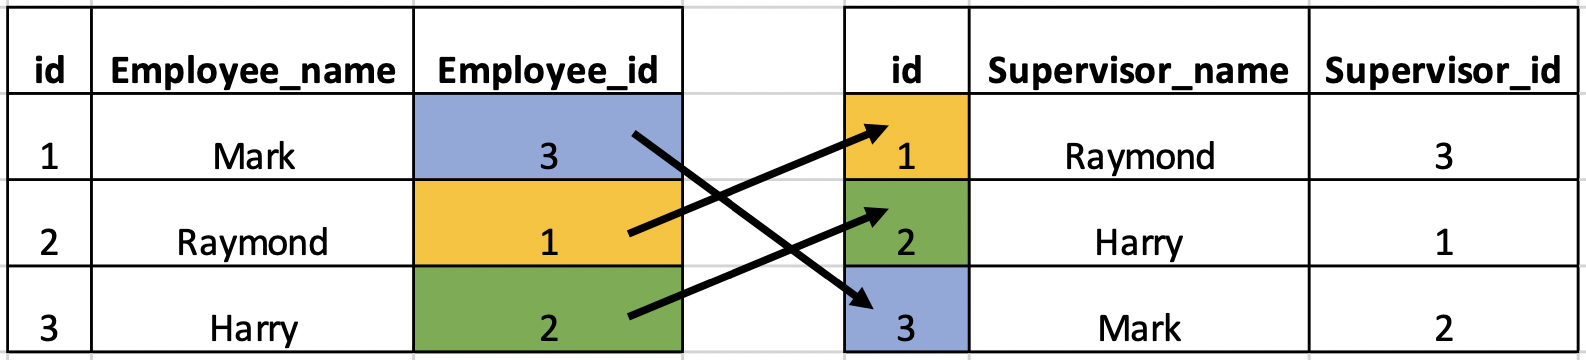

### ** Finding a report of each employees and their supervisors (both are staff of the company) **

In [10]:
%%sql
--Below is the Query that returns the employees and supervisors

SELECT
    e1.employeeid,
    e1.firstname||' '||e1.lastname AS Employee_Name,
    e2.employeeid AS SupervisorID,
    e2.firstname||' '||e2.lastname AS Supervisor_name
    
FROM 
    employees e1
    
LEFT JOIN employees e2
    ON e1.reportsto = e2.employeeid

ORDER BY 2
LIMIT 10;

 * sqlite:///chinook.db
Done.


EmployeeId,Employee_Name,SupervisorID,Supervisor_name
1,Andrew Adams,None,None
3,Jane Peacock,2,Nancy Edwards
8,Laura Callahan,6,Michael Mitchell
4,Margaret Park,2,Nancy Edwards
6,Michael Mitchell,1,Andrew Adams
2,Nancy Edwards,1,Andrew Adams
7,Robert King,6,Michael Mitchell
5,Steve Johnson,2,Nancy Edwards


We use left join because our left table is longer than the right table and we need to see all te content on the table.

## Conclusion

We have presented the various types of JOIN functions in SQL and hope that with our presentation and explanations with some examples we will make use of this powerful function in our queries.

It is fast and efficient way of optimising SQL queries when applied appropriately.

## References

Data Source and Materials
    - EXPLORE DSA
    - Dataquest: Learning Data Science
    - W3schools.com